In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2024-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131855,16.379533,16.126146,16.358437,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3264,2024-12-23,195.990005,196.490005,191.630005,194.029999,15235900
3265,2024-12-24,197.570007,197.669998,195.197998,196.169998,6809800
3266,2024-12-26,197.100006,198.160004,195.869995,196.740005,7907900


In [7]:
ma_100_days = data.Close.rolling(100).mean()

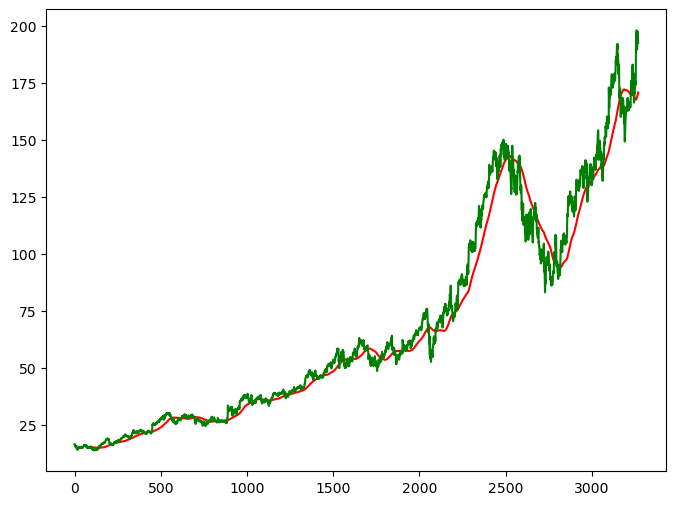

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

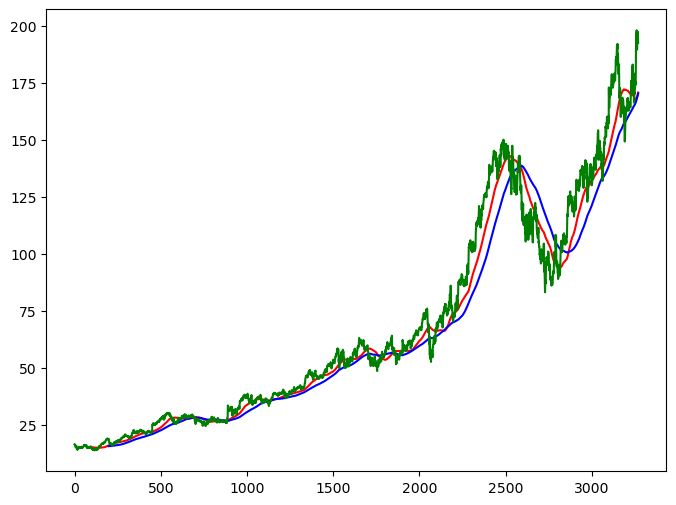

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

2615

In [15]:
data_test.shape[0]

654

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [19]:
x, y = np.array(x), np.array(y)

In [20]:
!pip install tensorflow keras


Defaulting to user installation because normal site-packages is not writeable


In [21]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import numpy as np  # If needed

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - loss: 0.0475
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - loss: 0.0068
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - loss: 0.0054
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - loss: 0.0042
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - loss: 0.0045
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - loss: 0.0048
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - loss: 0.0044
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - loss: 0.0037
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - loss: 0.0038
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - loss: 0.0032
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - loss: 0.0037
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - loss: 0.0038
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - loss: 0.0029
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - loss: 0.0035
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [28]:
pas_100_days = data_train.tail(100)

In [29]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [30]:
data_test_scale  =  scaler.fit_transform(data_test)

In [31]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [32]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step


In [33]:
scale =1/scaler.scale_

In [34]:
y_predict = y_predict*scale

In [35]:
y = y*scale

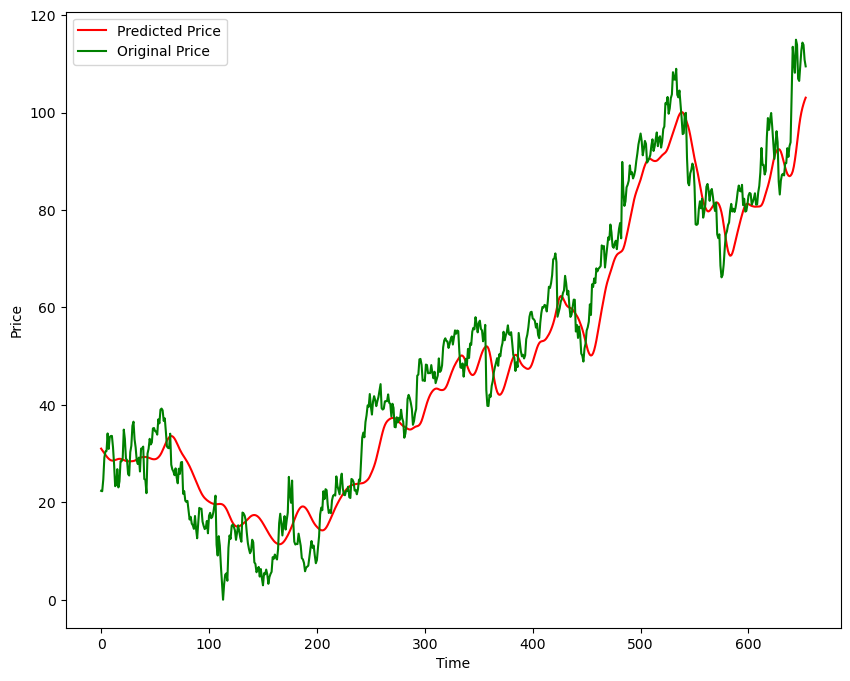

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
model.save('Stock Predictions Model.keras')